In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit.circuit.library import RealAmplitudes, TwoLocal
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.utils.loss_functions.loss_functions import Loss
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from term_loss.loss import L1Loss_ERM, L1Loss_TERM, L2Loss_ERM, L2Loss_TERM, CrossEntropyLoss_ERM, CrossEntropyLoss_TERM

In [35]:
iris_data = load_iris()
features = iris_data.data
labels = iris_data.target
features = MinMaxScaler(feature_range=(-np.pi, np.pi)).fit_transform(features)
split = 5
excess_class = 0
train_index_total = pd.read_excel(f"data/train_index_split{split}.xlsx", header=None).to_numpy()
test_index_total = pd.read_excel(f"data/test_index_split{split}.xlsx", header=None).to_numpy()
train_index = train_index_total[:, excess_class]
test_index = test_index_total[:, excess_class]
train_features = features[train_index]
train_labels = labels[train_index]
test_features = features[test_index]
test_labels = labels[test_index]

In [64]:
num_qubits = features.shape[1]
feature_reps = 1
ansatz_reps = 2
maxiter = 1000
t = 2
feature_map = RealAmplitudes(num_qubits=num_qubits, entanglement="linear", parameter_prefix='x', reps=feature_reps, skip_final_rotation_layer=True)
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=ansatz_reps, entanglement='linear', skip_final_rotation_layer=False)
initial_point = (np.random.random(ansatz.num_parameters) - 0.5) * 2 * np.pi 

# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

# construct neural network classifier
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=L_BFGS_B(maxiter=maxiter),
    callback=callback_graph,
    loss = L2Loss_TERM(t=t),
    initial_point = initial_point
)

newpath = f'/Users/choyboy/Documents/Python/TERM/vqc_data/cobyla/l2_loss/term_t{t}/split{split}_class{excess_class}'
if not os.path.exists(newpath):
    os.makedirs(newpath)

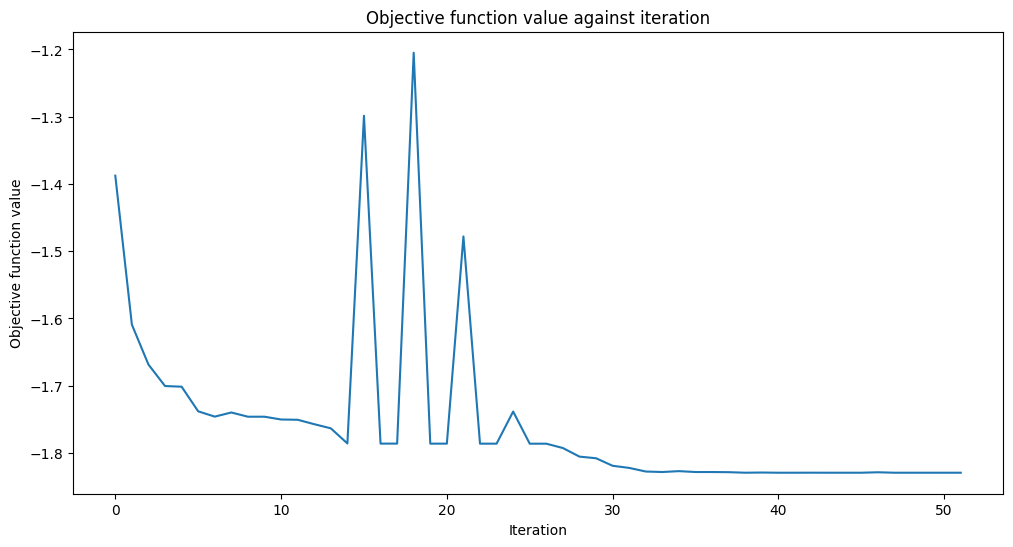

Train accuracy: 0.9642857142857143
Test accuracy: 1.0


In [65]:
# clear objective value history
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to training data
vqc.fit(train_features, train_labels)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
train_score = vqc.score(train_features, train_labels)
test_score = vqc.score(test_features, test_labels)
print(f"Train accuracy: {train_score}")
print(f"Test accuracy: {test_score}")

# save the model
# vqc.save(f'{newpath}/a{ansatz_reps}')

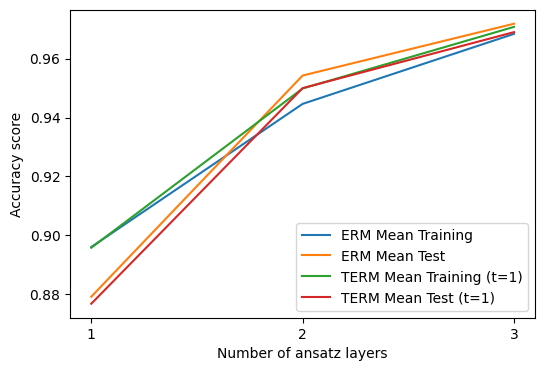

In [84]:
df = pd.read_excel('iris_stats.xlsx')
df_erm = df[df['loss'] == 'erm']
df_term_t1 = df[df['loss'] == 'term']

df_erm_a1 = df_erm[df_erm['ansatz_layers'] == 1]
df_erm_a2 = df_erm[df_erm['ansatz_layers'] == 2]
df_erm_a3 = df_erm[df_erm['ansatz_layers'] == 3]

df_term_t1_a1 = df_term_t1[df_term_t1['ansatz_layers'] == 1]
df_term_t1_a2 = df_term_t1[df_term_t1['ansatz_layers'] == 2]
df_term_t1_a3 = df_term_t1[df_term_t1['ansatz_layers'] == 3]

erm_a1_best_training_mean = df_erm_a1['best_training'].mean()
erm_a1_best_test_mean = df_erm_a1['best_test'].mean()
erm_a1_mean_training_mean = df_erm_a1['mean_training'].mean()
erm_a1_mean_test_mean = df_erm_a1['mean_test'].mean()

erm_a2_best_training_mean = df_erm_a2['best_training'].mean()
erm_a2_best_test_mean = df_erm_a2['best_test'].mean()
erm_a2_mean_training_mean = df_erm_a2['mean_training'].mean()
erm_a2_mean_test_mean = df_erm_a2['mean_test'].mean()

erm_a3_best_training_mean = df_erm_a3['best_training'].mean()
erm_a3_best_test_mean = df_erm_a3['best_test'].mean()
erm_a3_mean_training_mean = df_erm_a3['mean_training'].mean()
erm_a3_mean_test_mean = df_erm_a3['mean_test'].mean()

term_t1_a1_best_training_mean = df_term_t1_a1['best_training'].mean()
term_t1_a1_best_test_mean = df_term_t1_a1['best_test'].mean()
term_t1_a1_mean_training_mean = df_term_t1_a1['mean_training'].mean()
term_t1_a1_mean_test_mean = df_term_t1_a1['mean_test'].mean()

term_t1_a2_best_training_mean = df_term_t1_a2['best_training'].mean()
term_t1_a2_best_test_mean = df_term_t1_a2['best_test'].mean()
term_t1_a2_mean_training_mean = df_term_t1_a2['mean_training'].mean()
term_t1_a2_mean_test_mean = df_term_t1_a2['mean_test'].mean()

term_t1_a3_best_training_mean = df_term_t1_a3['best_training'].mean()
term_t1_a3_best_test_mean = df_term_t1_a3['best_test'].mean()
term_t1_a3_mean_training_mean = df_term_t1_a3['mean_training'].mean()
term_t1_a3_mean_test_mean = df_term_t1_a3['mean_test'].mean()

x = np.array([1, 2, 3])

erm_best_training = np.array([erm_a1_best_training_mean, erm_a2_best_training_mean, erm_a3_best_training_mean])
erm_best_test = np.array([erm_a1_best_test_mean, erm_a2_best_test_mean, erm_a3_best_test_mean])
erm_mean_training = np.array([erm_a1_mean_training_mean, erm_a2_mean_training_mean, erm_a3_mean_training_mean])
erm_mean_test = np.array([erm_a1_mean_test_mean, erm_a2_mean_test_mean, erm_a3_mean_test_mean])
term_t1_best_training = np.array([term_t1_a1_best_training_mean, term_t1_a2_best_training_mean, term_t1_a3_best_training_mean])
term_t1_best_test = np.array([term_t1_a1_best_test_mean, term_t1_a2_best_test_mean, term_t1_a3_best_test_mean])
term_t1_mean_training = np.array([term_t1_a1_mean_training_mean, term_t1_a2_mean_training_mean, term_t1_a3_mean_training_mean])
term_t1_mean_test = np.array([term_t1_a1_mean_test_mean, term_t1_a2_mean_test_mean, term_t1_a3_mean_test_mean])


plt.plot(x, erm_mean_training, label='ERM Mean Training')
plt.plot(x, erm_mean_test, label='ERM Mean Test')
plt.plot(x, term_t1_mean_training, label='TERM Mean Training (t=1)')
plt.plot(x, term_t1_mean_test, label='TERM Mean Test (t=1)')
plt.xticks(x)
plt.xlabel('Number of ansatz layers')
plt.ylabel('Accuracy score')
plt.legend()

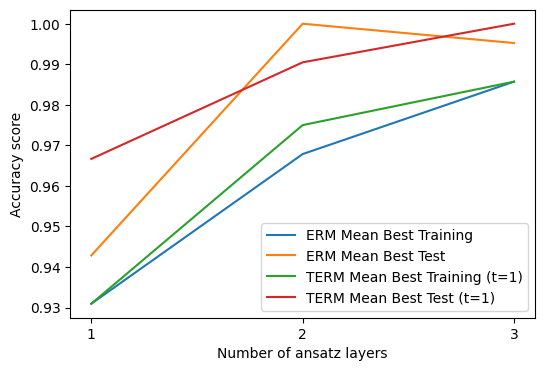

In [85]:
plt.plot(x, erm_best_training, label='ERM Mean Best Training')
plt.plot(x, erm_best_test, label='ERM Mean Best Test')
plt.plot(x, term_t1_best_training, label='TERM Mean Best Training (t=1)')
plt.plot(x, term_t1_best_test, label='TERM Mean Best Test (t=1)')
plt.xticks(x)
plt.xlabel('Number of ansatz layers')
plt.ylabel('Accuracy score')
plt.legend()